<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebook/Keras_6_1_a_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 多元分類

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
np.random.seed(7)  # 指定亂數種子
target_mapping = {"setosa": 0,
          "versicolor": 1,
          "virginica": 2}
# 載入資料集
df = pd.read_csv("./iris_data.csv")
df["target"] = df["target"].map(target_mapping)
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料

In [3]:
# 分割成特徵資料和標籤資料
X = dataset[:,0:4].astype(float)
Y = to_categorical(dataset[:,4])
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# 分割成訓練和測試資料集
X_train, Y_train = X[:120], Y[:120]     # 訓練資料前120筆
X_test, Y_test = X[120:], Y[120:]       # 測試資料後30筆

In [4]:
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("iris.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [5]:
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


Testing ...
測試資料集的準確度 = 0.90


In [6]:
# 計算分類的預測值
print("\nPredicting ...")
Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred).astype(int)
print(Y_pred)
Y_target = dataset[:,4][120:].astype(int)
print(Y_target)


Predicting ...
[[1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
[0 1 1 2 2 1 2 0 1 1 0 0 0 1 1 0 2 2 1 2 0 2 1 1 0 2 1 2 1 0]


In [7]:
print(Y_target.shape)
print(Y_pred.shape)

(30,)
(30, 3)


In [8]:
print(type(Y_target),type(Y_pred))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
df['label'] = pd.DataFrame(Y_target)
df1 = pd.DataFrame(Y_pred, columns=['0','1','2'])
dfs = pd.concat([df, df1], axis=1, join='inner')

In [10]:
dfs

,sepal_length,sepal_width,petal_length,petal_width,target,label,0,1,2
0,5.1,3.5,1.4,0.2,0,0.0,1,0,0
1,4.9,3.0,1.4,0.2,0,1.0,0,1,0
2,4.7,3.2,1.3,0.2,0,1.0,0,1,0
3,4.6,3.1,1.5,0.2,0,2.0,0,0,1
4,5.0,3.6,1.4,0.2,0,2.0,0,0,1
5,5.4,3.9,1.7,0.4,0,1.0,0,1,0
6,4.6,3.4,1.4,0.3,0,2.0,0,1,0
7,5.0,3.4,1.5,0.2,0,0.0,1,0,0
8,4.4,2.9,1.4,0.2,0,1.0,0,1,0
9,4.9,3.1,1.5,0.1,0,1.0,0,1,0


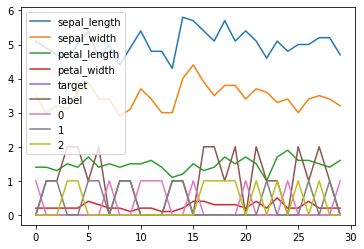

In [11]:
dfs.plot()

In [14]:
import numpy as np

class Encoder(object):
    def __init__(self,class_number,start_with=0):
        self._start_with = 0
        self._n_class = class_number
        self.y = np.zeros(self._n_class,dtype=float)
    
    def one_hot_encode(self,x):
        self.y[x - self._start_with] = 1
        return self.y
    
    def label(self,X):
        return np.argmax(X) + self._start_with

In [19]:
encoder = Encoder(3)
y_pred = []
for yh in Y_pred:
  a = encoder.label(yh)
  y_pred.append(a)
ypred = np.array(y_pred)

In [20]:
print(type(ypred))
print(type(Y_target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
# 顯示混淆矩陣
tb = pd.crosstab(ypred,Y_target)
print(tb)
#tb.to_html("Ch6_1_3.html")

col_0  0   1  2
row_0          
0      9   0  0
1      0  10  1
2      0   2  8


In [23]:
from sklearn.metrics import classification_report

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.83333333 0.16666667]
 [0.         0.11111111 0.88888889]]


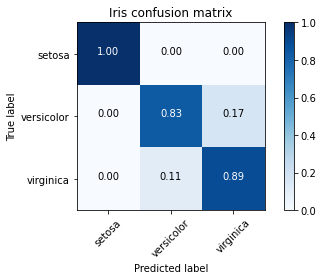

In [26]:
'''
setosa: 山鳶尾
versicolor: 變色鳶尾
virginica: 維吉尼亞鳶尾
'''
target_names = ['setosa','versicolor','virginica']
plt.figure()
cnf_matrix = confusion_matrix(Y_target, ypred)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True,
                    title="Iris" + ' confusion matrix')

plt.show()